# Evaluación de Modelos

## K-MEANS PARA CLUSTERING

El objetivo principal del algoritmo K-Means es agrupar datos similares en clusters o grupos. Los clusters son conjuntos de puntos de datos que son similares entre sí en términos de características. Es importante destacar que K-Means no asigna etiquetas a los puntos de datos. Simplemente agrupa los datos en clusters basados en similitud. En este caso, se realiza una asignación dependiendo el número de cluster. Sin embargo, se utilizarán técnicas de clasificación supervisada como regresión logística, máquinas de soporte vectorial (SVM), árboles de decisión, entre otros.

In [145]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
df = pd.read_csv('C:\\Users\\Andres\\Downloads\\MachingLerningUN\\MachingLerningUN\\jbook_ml202330\\docs\\Data.csv', sep=";")
df.head()
df_activos = df[df['Recency'] <= 48]
df_inactivos = df[df['Recency'] > 48]

2. Las variables Frecuencia, y Monetario se escalan en un rango discreto de 1 a 5, 1 siendo el mas bajo, y 5 siendo el mas alto. Esto se hace por medio de segmentación en cuantiles (20%, 40%, 60%, 80%, 100%).
3. La variable Recencia se escala, similar a Frecuencia y Monetario, en un rango discreto de 1 a 5, 1 siendo el mas reciente, y 5 siendo el menos reciente.

In [146]:
import pandas as pd
import numpy as np
#Calcular cuantiles
cuantiles_frequency = np.percentile(df_activos["Frequency"], [20, 40, 60, 80, 100])
cuantiles_monetario = np.percentile(df_activos["Monetario"], [20, 40, 60, 80, 100])

# Define una función para escalar los valores
def escalar(valor, cuantiles):
    if valor <= cuantiles[0]:
        return 1
    elif valor <= cuantiles[1]:
        return 2
    elif valor <= cuantiles[2]:
        return 3
    elif valor <= cuantiles[3]:
        return 4
    else:
        return 5

# Aplica la función a las columnas correspondientes
df_activos["Frequency_Scaled"] = df_activos["Frequency"].apply(lambda x: escalar(x, cuantiles_frequency))
df_activos["Monetario_Scaled"] = df_activos["Monetario"].apply(lambda x: escalar(x, cuantiles_monetario))

#Calcular cuantiles
cuantiles_recency = np.percentile(df_activos["Recency"], [20, 40, 60, 80, 100])
def escalar_recency(valor, cuantiles):
    if valor <= cuantiles[0]:
        return 1
    elif valor <= cuantiles[1]:
        return 2
    elif valor <= cuantiles[2]:
        return 3
    elif valor <= cuantiles[3]:
        return 4
    else:
        return 5
df_activos["Recency_Scaled"] = df_activos["Recency"].apply(lambda x: escalar_recency(x, cuantiles_recency))    

Se realiza el ejercicio tanto para los Usuarios Activos como los Inactivos.

In [147]:
import pandas as pd
import numpy as np
#Calcular cuantiles
cuantiles_frequency = np.percentile(df_inactivos["Frequency"], [20, 40, 60, 80, 100])
cuantiles_monetario = np.percentile(df_inactivos["Monetario"], [20, 40, 60, 80, 100])

# Define una función para escalar los valores
def escalar(valor, cuantiles):
    if valor <= cuantiles[0]:
        return 1
    elif valor <= cuantiles[1]:
        return 2
    elif valor <= cuantiles[2]:
        return 3
    elif valor <= cuantiles[3]:
        return 4
    else:
        return 5

# Aplica la función a las columnas correspondientes
df_inactivos["Frequency_Scaled"] = df_inactivos["Frequency"].apply(lambda x: escalar(x, cuantiles_frequency))
df_inactivos["Monetario_Scaled"] = df_inactivos["Monetario"].apply(lambda x: escalar(x, cuantiles_monetario))

#Calcular cuantiles
cuantiles_recency = np.percentile(df_inactivos["Recency"], [20, 40, 60, 80, 100])
def escalar_recency(valor, cuantiles):
    if valor <= cuantiles[0]:
        return 1
    elif valor <= cuantiles[1]:
        return 2
    elif valor <= cuantiles[2]:
        return 3
    elif valor <= cuantiles[3]:
        return 4
    else:
        return 5
df_inactivos["Recency_Scaled"] = df_inactivos["Recency"].apply(lambda x: escalar_recency(x, cuantiles_recency))   

Una vez escalados los datos, se procede a crear y  entrenar el Modelo K-means para el conjunto de datos de Usuarios Activos. Se crea un objeto, en el cual se define el número de Clusters a crear (4).

In [148]:

import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import silhouette_score

# Seleccionar las columnas
X = df_activos[['Frequency_Scaled', 'Monetario_Scaled', 'Recency_Scaled']]

# Crea un objeto K-Means con el número de clusters
kmeans = KMeans(n_clusters=4)

# Entrenar el modelo K-Means
kmeans.fit(X)

# Asignar una etiqueta de cluster a cada punto de datos
labels = kmeans.labels_

# Agregar las etiquetas de cluster al DataFrame original
df_activos['Cluster'] = labels

A continuación procedemos con la visualización de los Clusters creados por el modelo. Se crea un gráfico en 3D donde se pueden evidenciar claramente cada uno de los clusters creados. Tenemos 4 para este ejercicio, identificados con color azul, amarillo, morado y verde.

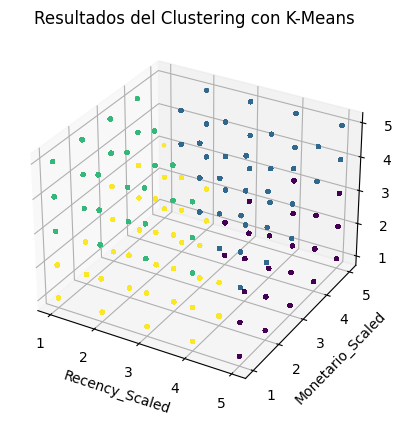

In [149]:
# Visualizar los resultados del clustering
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_activos['Frequency_Scaled'], df_activos['Monetario_Scaled'], df_activos['Recency_Scaled'], c=labels, cmap='viridis', s=5)
ax.set_xlabel('Recency_Scaled')
ax.set_ylabel('Monetario_Scaled')
ax.set_zlabel('Frequency_Scaled')
ax.set_title('Resultados del Clustering con K-Means')
plt.show()

In [150]:
df_activos.head()

,Identificacion,Departamento,Localidad,Fecha_Nacimiento,Edad,Genero,Estrato,Recency,Frequency,Monetario,Frequency_Scaled,Monetario_Scaled,Recency_Scaled,Cluster
4,35993.0,ATLANTICO,BARRANQUILLA,18/10/1931,93,Masculino,2,5,4,475000,4,1,1,3
14,71696.0,ATLANTICO,BARRANQUILLA,13/10/1930,94,Masculino,4,47,1,141900,1,1,5,2
23,84984.0,CESAR,VALLEDUPAR,10/11/1931,93,Femenino,5,16,3,476300,3,1,3,2
29,93091.0,MAGDALENA,SANTA MARTA (MAG),11/12/1945,79,Masculino,4,48,1,3292900,1,2,5,2
40,120698.0,ATLANTICO,BARRANQUILLA,10/06/1933,92,Masculino,5,28,3,420000,3,1,4,2


Como se mencionó al inicio, el modelo K-Means es ideal para agrupar los datos en clusters pero no asigna etiquetas. En este caso, procederemos a asignar manualmente una categoría a cada uno de los segmentos con el fin de evaluar más adelante modelos supervisados que nos puedan entregar las etiquetas y así poder comparar.

In [151]:
# Se asignan las etiquetas de clasificación
def asignaretiqueta(cluster):
    if cluster == 0:
        return "Nuevo"
    elif cluster == 1:
        return "Bronce"
    elif cluster == 2:
        return "Plata"
    elif cluster == 3:
        return "Diamante"

df_activos['Segmento'] = df_activos['Cluster'].apply(asignaretiqueta)
df_activos.head()

,Identificacion,Departamento,Localidad,Fecha_Nacimiento,Edad,Genero,Estrato,Recency,Frequency,Monetario,Frequency_Scaled,Monetario_Scaled,Recency_Scaled,Cluster,Segmento
4,35993.0,ATLANTICO,BARRANQUILLA,18/10/1931,93,Masculino,2,5,4,475000,4,1,1,3,Diamante
14,71696.0,ATLANTICO,BARRANQUILLA,13/10/1930,94,Masculino,4,47,1,141900,1,1,5,2,Plata
23,84984.0,CESAR,VALLEDUPAR,10/11/1931,93,Femenino,5,16,3,476300,3,1,3,2,Plata
29,93091.0,MAGDALENA,SANTA MARTA (MAG),11/12/1945,79,Masculino,4,48,1,3292900,1,2,5,2,Plata
40,120698.0,ATLANTICO,BARRANQUILLA,10/06/1933,92,Masculino,5,28,3,420000,3,1,4,2,Plata


El conjunto de Datos de Usuarios Inactivos no se procesa bajo el modelo de K-Means porque este grupo de usuarios ya es considerado un Cluster. Se Prodece a modificar el dataframe, agregando manualmente las columnas Cluster y Segmento con el fin de poder unificar este dataframe con el de usuarios Activos.

In [152]:
df_inactivos['Cluster'] = '4'
df_inactivos['Segmento'] = 'Inactivo'
df_inactivos.head()

,Identificacion,Departamento,Localidad,Fecha_Nacimiento,Edad,Genero,Estrato,Recency,Frequency,Monetario,Frequency_Scaled,Monetario_Scaled,Recency_Scaled,Cluster,Segmento
0,20888.0,ATLANTICO,BARRANQUILLA,9/03/1928,97,Masculino,6,70,2,204000,4,1,3,4,Inactivo
1,25220.0,ATLANTICO,BARRANQUILLA,23/04/1953,72,Masculino,5,92,1,1443498,1,2,5,4,Inactivo
2,31903.0,CESAR,VALLEDUPAR,18/05/1927,98,Femenino,6,97,1,1555569,1,2,5,4,Inactivo
3,35796.0,ATLANTICO,BARRANQUILLA,9/02/1928,97,Masculino,6,82,2,251999,4,1,4,4,Inactivo
5,37332.0,ATLANTICO,BARRANQUILLA,29/06/1936,89,Masculino,4,79,1,122000,1,1,4,4,Inactivo


Unificamos ambos dataframes para otener un solo conjunto de datos. Y validar todos los segmentos obtenidos.

In [155]:
df = pd.concat([df_activos, df_inactivos], axis=0, ignore_index=True)

Obtenemos la siguiente distribución de usuarios por segmento, donde se evidencia que los Usuarios inativos tienen una distribución mucho mayor. Esto es clave para que el área de mercadeo implemente estrategias que incentiven a los usuarios a hacer compras. Los usuarios Diamante y  distribución muy similar con aproximado 55mil usuarios y los usurios Nuevos y Plata también se comportan muy parecido con un aproximado de 87mil usuarios.

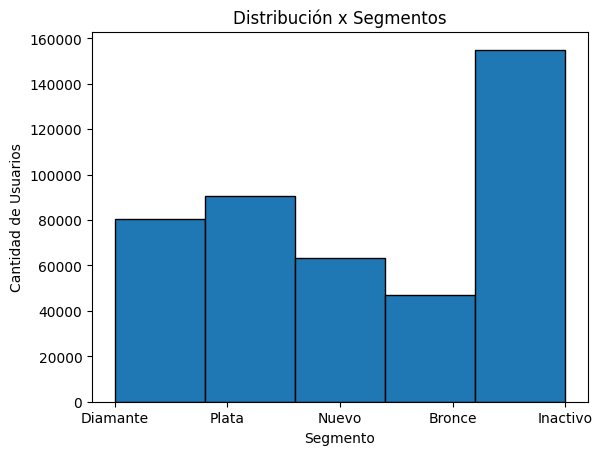

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
gfrecuencia = df['Segmento']

plt.hist(gfrecuencia, bins=5, edgecolor='k') 

plt.xlabel('Segmento')
plt.ylabel('Cantidad de Usuarios')
plt.title('Distribución x Segmentos')

plt.show()

Finalmente, obtenemos un resumen de los datos por segmento. Estos datos proporcionan información sobre diferentes segmentos de usuarios, incluyendo el número de usuarios, cuán recientes son sus interacciones, con qué frecuencia interactúan y cuál es su valor monetario promedio. Estos detalles son valiosos para la segmentación de clientes y la toma de decisiones comerciales.

In [158]:
import pandas as pd

Tabla = df.groupby('Segmento').agg({
    'Identificacion': 'nunique',  # Recuento distinto de usuarios
    'Recency': 'mean',            # Promedio de Recency
    'Frequency': 'mean',          # Promedio de Frequency
    'Monetario': 'mean'           # Promedio de Monetario
}).reset_index()

Tabla.columns = ['Segmento', 'Usuarios', 'Recencia', 'Frecuencia', 'Monetario']
Tabla = Tabla.round(0)
print(Tabla)


   Segmento  Usuarios  Recencia  Frecuencia   Monetario
0    Bronce     47041      29.0         4.0   6954262.0
1  Diamante     80229       8.0         2.0   4845013.0
2  Inactivo    154978      70.0         2.0   2275067.0
3     Nuevo     63134       7.0         6.0  10132433.0
4     Plata     90535      33.0         2.0   2946637.0


**VIF**

Se Realiza reducción de dimensionalidad por medio de eliminiación de columnas altamente correlacionadas usando Variance Inflation Factor (VIF). Variables con un VIF mayor o igual a 5, indican posible multicolinealidad por lo tanto, se eliminan del conjunto de datos. Inicialmente, se eliminan del conjunto de datos las variables str.


In [159]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
df = df.drop(columns=['Departamento','Localidad','Genero','Fecha_Nacimiento','Segmento'])

In [160]:
num_columns = df.select_dtypes(include=[np.number])
vif1 = pd.DataFrame()
vif1["Variable"] = num_columns.columns
vif1["VIF"] = [variance_inflation_factor(num_columns.values, i) for i in range(num_columns.shape[1])]

Se identifican las variables con un VIF mayor a 5, y se procede con la eliminación del modelo.

In [161]:
VIF5 = vif1[vif1["VIF"] >= 5]
print(VIF5)

           Variable        VIF
1              Edad  13.002166
3           Recency   7.281547
4         Frequency  11.371990
5         Monetario  18.519116
6  Frequency_Scaled  12.123536
7  Monetario_Scaled  21.438869
8    Recency_Scaled   8.060663


In [163]:
df = df.drop(columns=['Edad','Recency','Frequency','Monetario'])

In [169]:
df['Cluster'] = pd.to_numeric(df['Cluster'], errors='coerce', downcast='integer')

El modelo se aplicará solo a los usuarios Activos.

In [170]:
df = df[df['Cluster'] != 4]

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 280939 entries, 0 to 280938
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Identificacion    280939 non-null  float64
 1   Estrato           280939 non-null  int64  
 2   Frequency_Scaled  280939 non-null  int64  
 3   Monetario_Scaled  280939 non-null  int64  
 4   Recency_Scaled    280939 non-null  int64  
 5   Cluster           280939 non-null  int8   
dtypes: float64(1), int64(4), int8(1)
memory usage: 13.1 MB


## MODELOS DE CLASIFICACIÓN

**K-NN (K-Nearest Neighbors):** Este algoritmo clasifica un punto de datos en función de la mayoría de los puntos de datos cercanos a él. Es especialmente útil para la segmentación basada en similitud.

**Decision Tree (Árbol de Decisión):** Los árboles de decisión dividen los datos en función de reglas de decisión en forma de un árbol. Son fáciles de interpretar y pueden utilizarse para segmentaciones claras basadas en reglas.

**Random Forest (Bosque Aleatorio):** Un conjunto de árboles de decisión que trabajan juntos para mejorar la precisión y reducir el sobreajuste. Puede ser útil para una segmentación robusta.

**XGBoost (Extreme Gradient Boosting):** Un algoritmo de aumento de gradientes extremos que se utiliza para tareas de segmentación y predicción. Es conocido por su alta eficacia y capacidad de manejar grandes conjuntos de datos.

**AdaBoost Classifier (AdaBoost con Clasificación):** Similar al AdaBoost Regressor, pero utilizado para problemas de clasificación.

In [260]:
from sklearn.model_selection import train_test_split
n = 200000
df_subset = df.iloc[:n]

X = df_subset.drop('Cluster', axis=1)
y = df_subset['Cluster']

# Separamos el conjunto de datos en Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [261]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier


# Se definen los modelos a evaluar
knn_model = KNeighborsClassifier()
tree_model = DecisionTreeClassifier()
rf_model = RandomForestClassifier()
xgb_model = xgb.XGBClassifier()
adaboost_classifier_model = AdaBoostClassifier()

El uso de pipelines facilita la experimentación y garantiza resultados reproducibles y coherentes. Cada pipeline encapsula el flujo de trabajo específico de un modelo, lo que facilita la gestión y la iteración en el desarrollo de modelos.

In [262]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Se crean pipelines para cada modelo
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()), 
    ('knn', knn_model)
])

tree_pipeline = Pipeline([
    ('tree', tree_model)
])

rf_pipeline = Pipeline([
    ('rf', rf_model)
])

xgb_pipeline = Pipeline([
    ('xgb', xgb_model)
])
adaboost_classifier_pipeline = Pipeline([
    ('adaboost_classifier', adaboost_classifier_model)
])



 La selección adecuada de los hiperparámetros es crucial para obtener un rendimiento óptimo de los modelos. Esto implica comprender cómo afectan los hiperparámetros al comportamiento del modelo, realizar búsquedas sistemáticas para encontrar los valores óptimos y adaptar los hiperparámetros a las características específicas del problema.

In [263]:
from sklearn.model_selection import GridSearchCV

# Se definen los hiperparámetros a buscar para cada modelo
param_grid_knn = {
    'knn__n_neighbors': [3, 5, 7],
    'knn__weights': ['uniform', 'distance']
}

param_grid_tree = {
    'tree__max_depth': [None, 5, 10],
    'tree__min_samples_split': [2, 5, 10]
}

param_grid_rf = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 5, 10]
}

param_grid_xgb = {
    'xgb__n_estimators': [50, 100, 200],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.2]
}

param_grid_adaboots = {
    'adaboots__n_estimators': [50, 100, 200],
    'adaboots__max_depth': [3, 5, 7],
    'adaboots__learning_rate': [0.01, 0.1, 0.2]
}
param_grid_adaboost_classifier = {
    'adaboost_classifier__n_estimators': [50, 100, 200],
    'adaboost_classifier__learning_rate': [0.01, 0.1, 0.2]
}


In [264]:
# Se realiza la búsqueda de hiperparámetros y validación cruzada para cada modelo
grid_search_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=5, scoring='roc_auc')
grid_search_tree = GridSearchCV(tree_pipeline, param_grid_tree, cv=5, scoring='roc_auc')
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring='roc_auc')
grid_search_xgb = GridSearchCV(xgb_pipeline, param_grid_xgb, cv=5, scoring='roc_auc')
grid_search_adaboost_classifier = GridSearchCV(adaboost_classifier_pipeline, param_grid_adaboost_classifier, cv=5, scoring='roc_auc')

In [265]:
# Se Ajustan los modelos a los datos de entrenamiento
grid_search_knn.fit(X_train, y_train)
grid_search_tree.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)
grid_search_xgb.fit(X_train, y_train)
grid_search_adaboost_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('adaboost_classifier',
                                        AdaBoostClassifier())]),
             param_grid={'adaboost_classifier__learning_rate': [0.01, 0.1, 0.2],
                         'adaboost_classifier__n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [266]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Función para calcular y registrar las métricas
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, model.predict_proba(X_test), average='weighted', multi_class='ovr')
    return precision, recall, f1, auc

# Evaluar cada modelo
knn_metrics = evaluate_model(grid_search_knn, X_test, y_test)
tree_metrics = evaluate_model(grid_search_tree, X_test, y_test)
rf_metrics = evaluate_model(grid_search_rf, X_test, y_test)
xgb_metrics = evaluate_model(grid_search_xgb, X_test, y_test)
adaboost_classifier_metrics = evaluate_model(grid_search_adaboost_classifier, X_test, y_test)

In [267]:
#Registrar resultados
results_df = pd.DataFrame({
    'Modelo': ['K-NN', 'Decision Tree', 'Random Forest', 'XGBoost', 'AdaBoost Classifier'],
    'Precisión': [knn_metrics[0], tree_metrics[0], rf_metrics[0], xgb_metrics[0], adaboost_classifier_metrics[0]],
    'Recall': [knn_metrics[1], tree_metrics[1], rf_metrics[1], xgb_metrics[1], adaboost_classifier_metrics[1]],
    'F1_Score': [knn_metrics[2], tree_metrics[2], rf_metrics[2], xgb_metrics[2], adaboost_classifier_metrics[2]],
    'AUC': [knn_metrics[3], tree_metrics[3], rf_metrics[3], xgb_metrics[3], adaboost_classifier_metrics[3]]
})

print(results_df)

                Modelo  Precisión    Recall  F1_Score       AUC
0                 K-NN   0.999250  0.999250  0.999250  0.999863
1        Decision Tree   1.000000  1.000000  1.000000  1.000000
2        Random Forest   1.000000  1.000000  1.000000  1.000000
3              XGBoost   0.934314  0.934717  0.933677  0.995424
4  AdaBoost Classifier   0.941678  0.937050  0.936154  0.987984


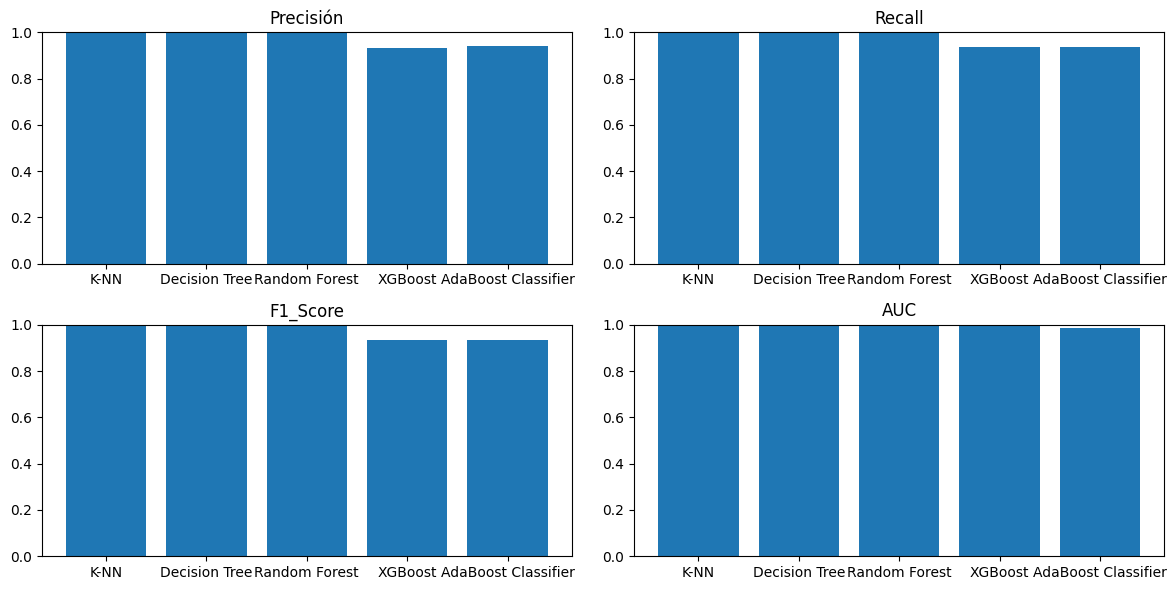

In [268]:
import pandas as pd
import matplotlib.pyplot as plt


# Graficar las métricas de precisión, recall, F1_Score y AUC
plt.figure(figsize=(12, 6))

# Precisión
plt.subplot(2, 2, 1)
plt.bar(results_df['Modelo'], results_df['Precisión'])
plt.title('Precisión')
plt.ylim(0, 1)

# Recall
plt.subplot(2, 2, 2)
plt.bar(results_df['Modelo'], results_df['Recall'])
plt.title('Recall')
plt.ylim(0, 1)

# Puntuación F1
plt.subplot(2, 2, 3)
plt.bar(results_df['Modelo'], results_df['F1_Score'])
plt.title('F1_Score')
plt.ylim(0, 1)

# AUC
plt.subplot(2, 2, 4)
plt.bar(results_df['Modelo'], results_df['AUC'])
plt.title('AUC')
plt.ylim(0, 1)

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


Se realiza validación cruzada para verificar la 

In [228]:
from sklearn.model_selection import StratifiedKFold

# Crear una instancia de StratifiedKFold para la validación cruzada
stratified_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Se realiza la búsqueda de hiperparámetros y validación cruzada para cada modelo
grid_search_knn = GridSearchCV(knn_pipeline, param_grid_knn, cv=stratified_cv, scoring='roc_auc')
grid_search_tree = GridSearchCV(tree_pipeline, param_grid_tree, cv=stratified_cv, scoring='roc_auc')
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=stratified_cv, scoring='roc_auc')
grid_search_xgb = GridSearchCV(xgb_pipeline, param_grid_xgb, cv=stratified_cv, scoring='roc_auc')
grid_search_adaboost_classifier = GridSearchCV(adaboost_classifier_pipeline, param_grid_adaboost_classifier, cv=stratified_cv, scoring='roc_auc')

# Se Ajustan los modelos a los datos de entrenamiento
grid_search_knn.fit(X_train, y_train)
grid_search_tree.fit(X_train, y_train)
grid_search_rf.fit(X_train, y_train)
grid_search_xgb.fit(X_train, y_train)
grid_search_adaboost_classifier.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('adaboost_classifier',
                                        AdaBoostClassifier())]),
             param_grid={'adaboost_classifier__learning_rate': [0.01, 0.1, 0.2],
                         'adaboost_classifier__n_estimators': [50, 100, 200]},
             scoring='roc_auc')

In [235]:
#Registrar resultados
results_df = pd.DataFrame({
    'Modelo': ['K-NN', 'Decision Tree', 'Random Forest', 'XGBoost', 'AdaBoost Classifier'],
    'Precisión': [knn_metrics[0], tree_metrics[0], rf_metrics[0], xgb_metrics[0], adaboost_classifier_metrics[0]],
    'Recall': [knn_metrics[1], tree_metrics[1], rf_metrics[1], xgb_metrics[1], adaboost_classifier_metrics[1]],
    'F1_Score': [knn_metrics[2], tree_metrics[2], rf_metrics[2], xgb_metrics[2], adaboost_classifier_metrics[2]],
    'AUC': [knn_metrics[3], tree_metrics[3], rf_metrics[3], xgb_metrics[3], adaboost_classifier_metrics[3]]
})

print(results_df)

                Modelo  Precisión    Recall  F1_Score       AUC
0                 K-NN   0.999858  0.999858  0.999858  0.999981
1        Decision Tree   1.000000  1.000000  1.000000  1.000000
2        Random Forest   1.000000  1.000000  1.000000  1.000000
3              XGBoost   0.960014  0.959386  0.958583  0.997397
4  AdaBoost Classifier   0.920794  0.917408  0.917675  0.986045


Se escoge el mejor modelo, según el AUC:

In [310]:
# Encuentra el mejor modelo según AUC
best_model_name = results_df.loc[results_df['AUC'].idxmax()]['Modelo']
best_model = None

# Encuentra el modelo correspondiente al mejor modelo
if best_model_name == 'K-NN':
    best_model = grid_search_knn.best_estimator_
elif best_model_name == 'Decision Tree':
    best_model = grid_search_tree.best_estimator_
elif best_model_name == 'Random Forest':
    best_model = grid_search_rf.best_estimator_
elif best_model_name == 'XGBoost':
    best_model = grid_search_xgb.best_estimator_
elif best_model_name == 'AdaBoost Classifier':
    best_model = grid_search_adaboost_classifier.best_estimator_
    
best_DecisionTree = grid_search_tree.best_estimator_
best_Knn = grid_search_knn.best_estimator_
best_RandomForest = grid_search_rf.best_estimator_
best_XGBoost = grid_search_xgb.best_estimator_
best_AdaBoost= grid_search_adaboost_classifier.best_estimator_



In [311]:
print(best_model)

Pipeline(steps=[('tree', DecisionTreeClassifier())])


Se prueba con un nuevo conjunto de datos:

In [312]:
test_df = df.tail(80939)

X_new = test_df.drop('Cluster', axis=1)
y_new = test_df['Cluster']


In [318]:
import pandas as pd
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

best_models = [best_DecisionTree, best_Knn, best_RandomForest, best_XGBoost, best_AdaBoost]
Modelo = ['Decision Tree','K-NN','Random Forest','XGBoost','AdaBoost Classifier']
# Lista para almacenar los resultados
results = []

# Itera sobre los modelos y calcula las métricas para cada modelo
for i, model in enumerate(best_models):
    # Inicializar métricas como None
    precision_new = None
    recall_new = None
    f1_new = None
    auc_new = None
    
    try:
        # Aplicar el modelo al nuevo conjunto de datos
        y_pred_new = model.predict(X_new)

        # Calcular las métricas de precisión en el nuevo conjunto de datos
        precision_new = precision_score(y_new, y_pred_new, average='weighted')
        recall_new = recall_score(y_new, y_pred_new, average='weighted')
        f1_new = f1_score(y_new, y_pred_new, average='weighted')

        # Calcular el AUC solo si el modelo tiene el método predict_proba
        if hasattr(model, 'predict_proba'):
            auc_new = roc_auc_score(y_new, model.predict_proba(X_new), average='weighted', multi_class='ovr')
    except Exception as e:
        print(f"Error al calcular métricas para {Modelo[i]}: {str(e)}")

    # Agregar las métricas al resultado
    results.append({
        'Modelo': Modelo[i],
        'Precisión': precision_new,
        'Recall': recall_new,
        'F1-Score': f1_new,
        'AUC': auc_new
    })

all_metrics_df = pd.DataFrame(results)

# Resultados
print(all_metrics_df)


                Modelo  Precisión    Recall  F1-Score       AUC
0        Decision Tree   1.000000  1.000000  1.000000  1.000000
1                 K-NN   0.993132  0.993081  0.993093  0.999107
2        Random Forest   1.000000  1.000000  1.000000  1.000000
3              XGBoost   0.945880  0.944786  0.944686  0.997618
4  AdaBoost Classifier   0.958528  0.954484  0.953891  0.992883


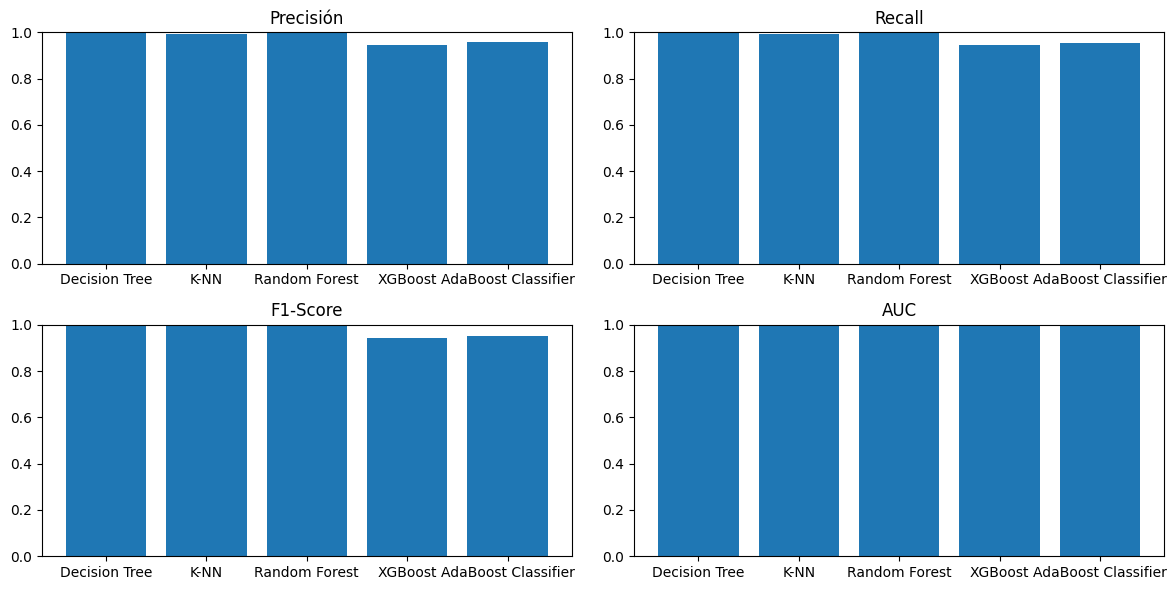

In [319]:
import pandas as pd
import matplotlib.pyplot as plt


# Graficar las métricas de precisión, recall, F1_Score y AUC
plt.figure(figsize=(12, 6))

# Precisión
plt.subplot(2, 2, 1)
plt.bar(all_metrics_df['Modelo'], all_metrics_df['Precisión'])
plt.title('Precisión')
plt.ylim(0, 1)

# Recall
plt.subplot(2, 2, 2)
plt.bar(all_metrics_df['Modelo'], all_metrics_df['Recall'])
plt.title('Recall')
plt.ylim(0, 1)

# Puntuación F1
plt.subplot(2, 2, 3)
plt.bar(all_metrics_df['Modelo'], all_metrics_df['F1-Score'])
plt.title('F1-Score')
plt.ylim(0, 1)

# AUC
plt.subplot(2, 2, 4)
plt.bar(all_metrics_df['Modelo'], all_metrics_df['AUC'])
plt.title('AUC')
plt.ylim(0, 1)

# Ajustar el espaciado entre los gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()